# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [14]:
# WRITE YOUR CODE HERE
library(tidyverse)
library(glmnet)
library(ggplot2)

We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [15]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [16]:
# WRITE YOUR CODE HERE
# Create indices for the training and test sets
train_indices <- sample(1:n, 50)  # randomly select 50 indices for training
test_indices <- setdiff(1:n, train_indices)  # select the remaining indices for testing

# Create separate data frames for training and test data
train_data <- data.frame(x = x[train_indices], y = y[train_indices])
test_data <- data.frame(x = x[test_indices], y = y[test_indices])

# Check the sizes of training and test sets
cat("Training set size:", nrow(train_data), "\n")
cat("Test set size:", nrow(test_data), "\n")

Training set size: 50 
Test set size: 51 


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

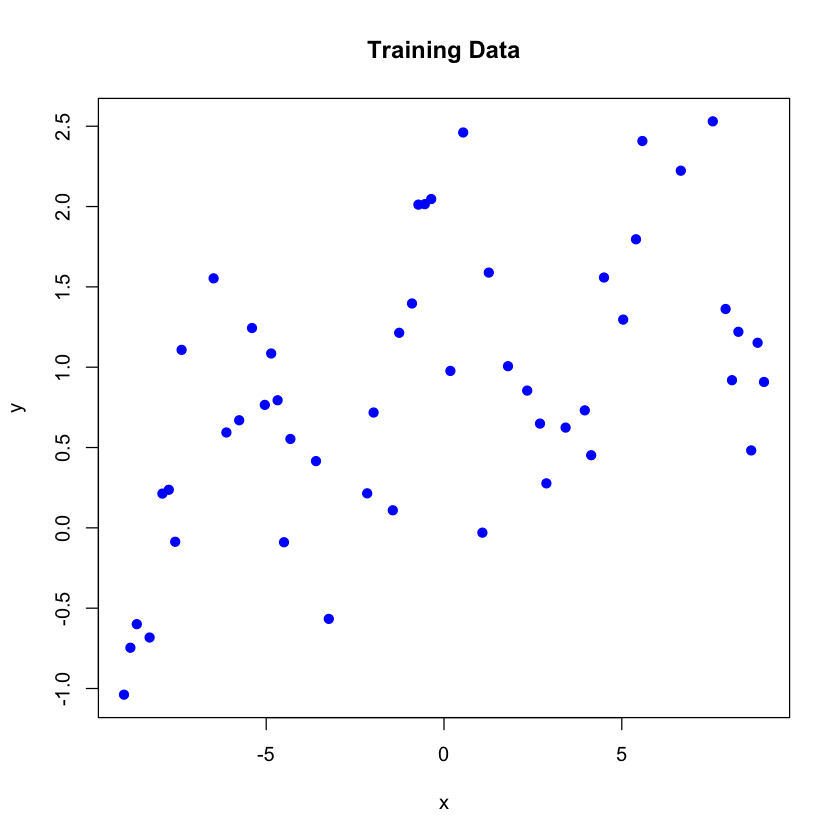

In [17]:
# WRITE YOUR CODE HERE
# Plot the training data
# Set plot background color to white
par(bg = 'white')
plot(train_data$x, train_data$y, 
     main = "Training Data", 
     xlab = "x", 
     ylab = "y",
     col = "blue",
     pch = 19)

How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
> There seems to be a weak positive relationship between x and y.

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 



Call:
lm(formula = y ~ poly(x, 2), data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35910 -0.57291 -0.03622  0.35611  1.28255 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.85195    0.09931   8.578 3.54e-11 ***
poly(x, 2)1  3.15030    0.70225   4.486 4.67e-05 ***
poly(x, 2)2 -1.61895    0.70225  -2.305   0.0256 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7022 on 47 degrees of freedom
Multiple R-squared:  0.3512,	Adjusted R-squared:  0.3236 
F-statistic: 12.72 on 2 and 47 DF,  p-value: 3.845e-05


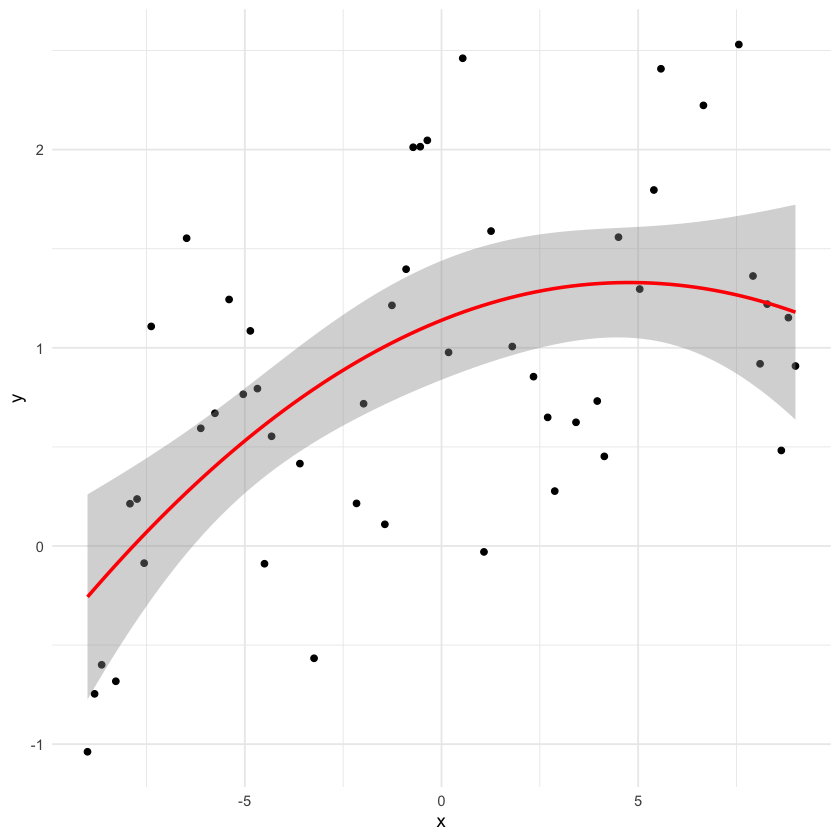

In [20]:
# Fit a second-degree polynomial regression model to the training data
poly_model <- lm(y ~ poly(x, 2), data = train_data)

summary(poly_model)
# Generate sequence of x values for plotting
x_seq <- seq(min(train_data$x), max(train_data$x), length.out = 100)

# Predict y values using the polynomial model
y_pred <- predict(poly_model, newdata = data.frame(x = x_seq))

par(bg = 'white')
# Plot the training data and the fitted polynomial curve
ggplot(train_data, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red") +
  labs(x = "x", y = "y") +
  theme_minimal()


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *Write your response here*
> The polynomial line fits the better than the straight line. It could probably fit the decrease at the end better. 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12), data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4116 -0.2205  0.1166  0.3200  0.7954 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.85195    0.06874  12.394 9.72e-15 ***
poly(x, 12)1   3.15030    0.48605   6.481 1.40e-07 ***
poly(x, 12)2  -1.61895    0.48605  -3.331  0.00197 ** 
poly(x, 12)3   0.62697    0.48605   1.290  0.20508    
poly(x, 12)4  -1.45302    0.48605  -2.989  0.00494 ** 
poly(x, 12)5  -0.17617    0.48605  -0.362  0.71907    
poly(x, 12)6  -1.96313    0.48605  -4.039  0.00026 ***
poly(x, 12)7   0.19817    0.48605   0.408  0.68583    
poly(x, 12)8   2.68021    0.48605   5.514 2.86e-06 ***
poly(x, 12)9   0.32926    0.48605   0.677  0.50235    
poly(x, 12)10 -0.61339    0.48605  -1.262  0.21485    
poly(x, 12)11  0.22288    0.48605   0.459  0.64924    
poly(x, 12)12  0.53904    0.48605   1.109  0.27458    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

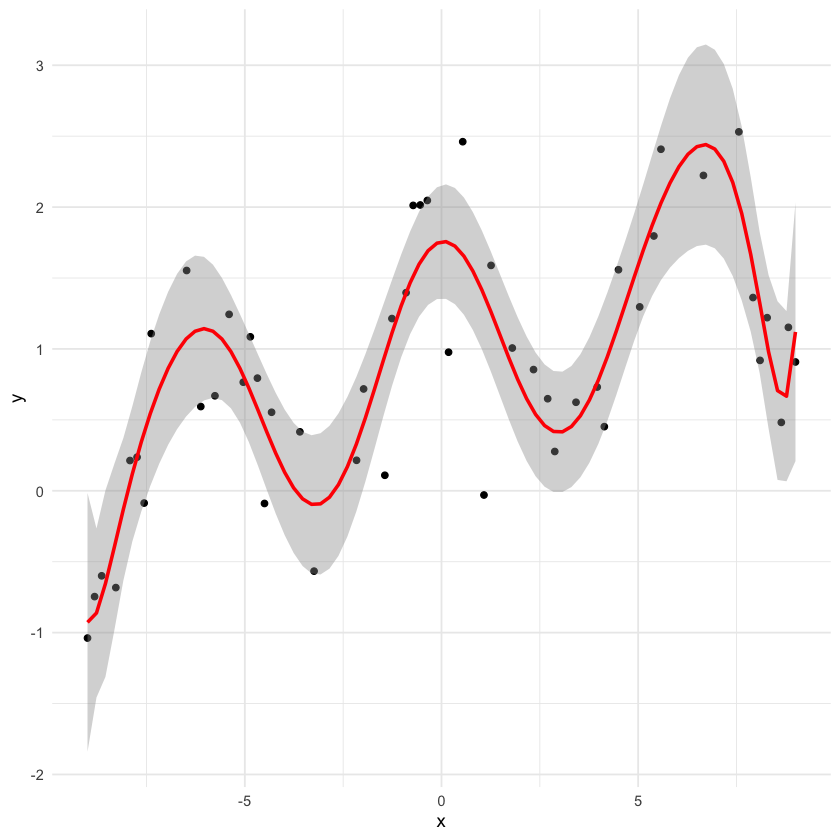

In [22]:
# WRITE YOUR CODE HERE

# Fit a second-degree polynomial regression model to the training data
poly_model <- lm(y ~ poly(x, 12), data = train_data)

summary(poly_model)
# Generate sequence of x values for plotting
x_seq <- seq(min(train_data$x), max(train_data$x), length.out = 100)

# Predict y values using the polynomial model
y_pred <- predict(poly_model, newdata = data.frame(x = x_seq))

par(bg = 'white')
# Plot the training data and the fitted polynomial curve
ggplot(train_data, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 12), color = "red") +
  labs(x = "x", y = "y") +
  theme_minimal()


> *Write your response here* 
> The 12th polynomial line fits better.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Wa

Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
War

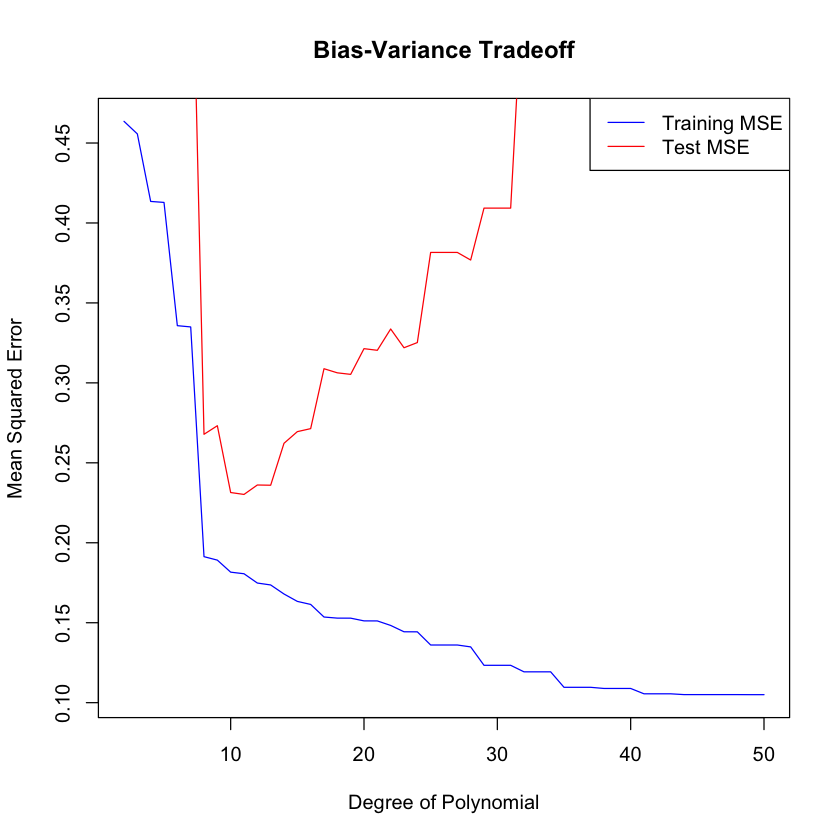

In [37]:
# Now do the variance-bias trade off analysis using regular regression
degree <- seq(2, 50)

# Need to setup your output vectors
train_mse <- numeric(length(degree))
test_mse <- numeric(length(degree))

for (k in degree) {
  # Fit the polynomial regression model to the training data
  poly_model <- lm(y ~ poly(x, k, raw = TRUE), data = train_data)
  
  # Predict y values for training data
  y_train_pred <- predict(poly_model, newdata = train_data)
  # Calculate MSE for training data
  train_mse[k - 1] <- mean((train_data$y - y_train_pred)^2)
  
  # Predict y values for test data
  y_test_pred <- predict(poly_model, newdata = test_data)
  # Calculate MSE for test data
  test_mse[k - 1] <- mean((test_data$y - y_test_pred)^2)
}

# Plot your results here
par(bg = 'white')
plot(degree, train_mse, type = "l", col = "blue", xlab = "Degree of Polynomial", ylab = "Mean Squared Error", main = "Bias-Variance Tradeoff")
lines(degree, test_mse, type = "l", col = "red")
legend("topright", legend = c("Training MSE", "Test MSE"), col = c("blue", "red"), lty = 1)


What do you see as $k$ increase?

> *Write your response here* 
> As k increases the test error increases and the train error decreases 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = test_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(poly_model, newdata = train_data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Wa

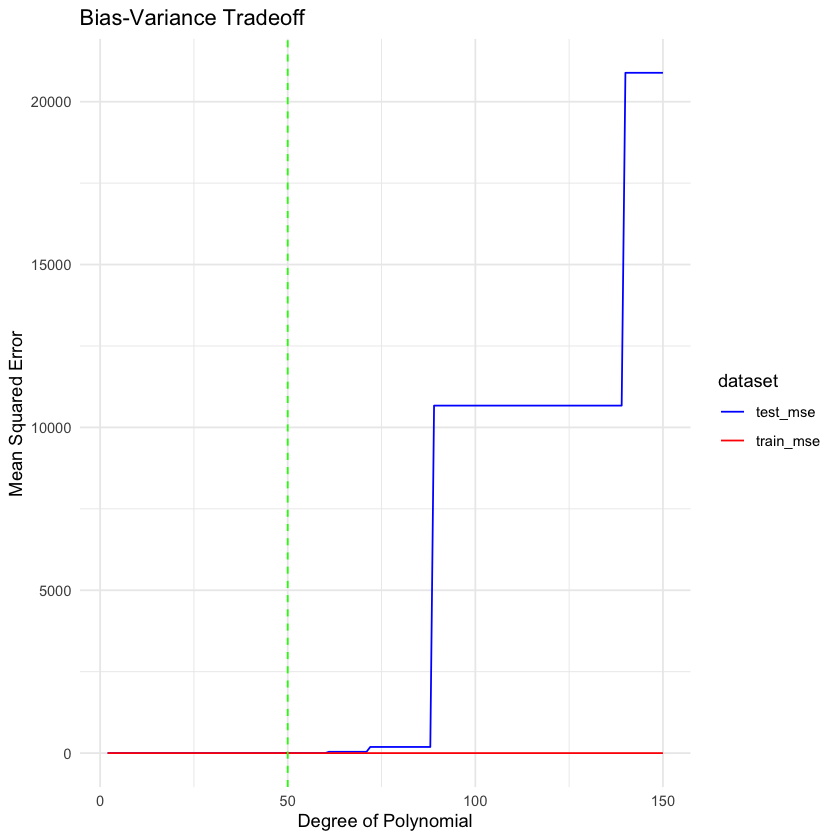

In [38]:
# WRITE YOUR CODE HERE
library(ggplot2)

# Now do the variance-bias trade off analysis using regular regression
degree <- seq(2, 150)

# Need to setup your output data frame
results <- data.frame(degree = degree, train_mse = numeric(length(degree)), test_mse = numeric(length(degree)))

for (k in degree) {
  # Fit the polynomial regression model to the training data
  poly_model <- lm(y ~ poly(x, k, raw = TRUE), data = train_data)
  
  # Predict y values for training data
  y_train_pred <- predict(poly_model, newdata = train_data)
  # Calculate MSE for training data
  train_mse <- mean((train_data$y - y_train_pred)^2)
  
  # Predict y values for test data
  y_test_pred <- predict(poly_model, newdata = test_data)
  # Calculate MSE for test data
  test_mse <- mean((test_data$y - y_test_pred)^2)
  
  # Store results
  results[k - 1, "train_mse"] <- train_mse
  results[k - 1, "test_mse"] <- test_mse
}

# Convert results to long format for ggplot2
results_long <- tidyr::gather(results, key = "dataset", value = "mse", -degree)

# Add a column to results_long indicating whether degree == n
n <- nrow(train_data)
results_long$n <- results_long$degree == n

# Plot using ggplot2
ggplot(results_long, aes(x = degree, y = mse, color = dataset)) +
  geom_line() +
  geom_vline(xintercept = n, linetype = "dashed", color = "green") +
  labs(title = "Bias-Variance Tradeoff",
       x = "Degree of Polynomial",
       y = "Mean Squared Error") +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()



What do you see as $k$ gets larger than $n$?

> *Write your response here* 
> As the degree of poynomial k gets larger the number of observations n, the train MSE stabilizes while the test error continues to increase.

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

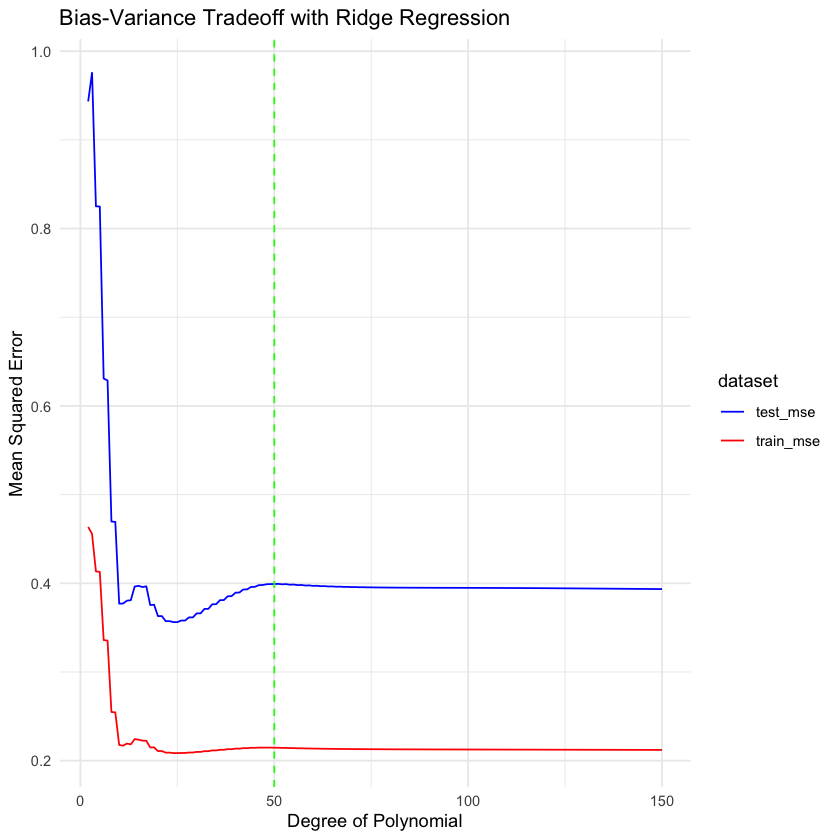

In [39]:
library(glmnet)
library(tidyr)
library(ggplot2)

# Now do the variance-bias trade off analysis using ridge regression
degree <- seq(2, 150)
lambda <- 0.00005

# Need to setup your output data frame
results <- data.frame(degree = degree, train_mse = numeric(length(degree)), test_mse = numeric(length(degree)))

for (k in degree) {
  # Create design matrix for polynomial features
  X_train <- poly(train_data$x, k, raw = TRUE)
  X_test <- poly(test_data$x, k, raw = TRUE)
  
  # Fit ridge regression model to the training data
  ridge_model <- glmnet(X_train, train_data$y, alpha = 0, lambda = lambda)
  
  # Predict y values for training data
  y_train_pred <- predict(ridge_model, newx = X_train)
  # Calculate MSE for training data
  train_mse <- mean((train_data$y - y_train_pred)^2)
  
  # Predict y values for test data
  y_test_pred <- predict(ridge_model, newx = X_test)
  # Calculate MSE for test data
  test_mse <- mean((test_data$y - y_test_pred)^2)
  
  # Store results
  results[k - 1, "train_mse"] <- train_mse
  results[k - 1, "test_mse"] <- test_mse
}

# Convert results to long format for ggplot2
results_long <- tidyr::gather(results, key = "dataset", value = "mse", -degree)

# Add a column to results_long indicating whether degree == n
n <- nrow(train_data)
results_long$n <- results_long$degree == n

# Plot using ggplot2
ggplot(results_long, aes(x = degree, y = mse, color = dataset)) +
  geom_line() +
  geom_vline(xintercept = n, linetype = "dashed", color = "green") +
  labs(title = "Bias-Variance Tradeoff with Ridge Regression",
       x = "Degree of Polynomial",
       y = "Mean Squared Error") +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()

What happens now when $k$ gets larger than $n$?

> *Write your response here* 

> The training and test error begin to stabilize. 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here* 
> Regularization simplifies the model by minimizing effect of weak of predictor variables. Therefore, variance is decreased and bias is increasd, which leads to a more generalizable model for new data.

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here* 
> 

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*